# **Hotel Reservations Data Analysis**

# Import Dependencies

In [4]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

C:\Users\amine\AppData\Local\Temp\ipykernel_4124\2151744951.py:1: DeprecationWarning: 
Pyarrow will become a required dependency of pandas in the next major release of pandas (pandas 3.0),
(to allow more performant data types, such as the Arrow string type, and better interoperability with other libraries)
but was not found to be installed on your system.
If this would cause problems for you,
please provide us feedback at https://github.com/pandas-dev/pandas/issues/54466
        
  import pandas as pd


# Dataset Loading

In [5]:
hotel_df = pd.read_csv("Hotel Bookings.csv")
hotel_df.head(5)

,hotel,is_canceled,lead_time,arrival_date_year,arrival_date_month,arrival_date_week_number,arrival_date_day_of_month,stays_in_weekend_nights,stays_in_week_nights,adults,...,deposit_type,agent,company,days_in_waiting_list,customer_type,adr,required_car_parking_spaces,total_of_special_requests,reservation_status,reservation_status_date
0,Resort Hotel,0,342,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
1,Resort Hotel,0,737,2015,July,27,1,0,0,2,...,No Deposit,NaN,NaN,0,Transient,0.0,0,0,Check-Out,2015-07-01
2,Resort Hotel,0,7,2015,July,27,1,0,1,1,...,No Deposit,NaN,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
3,Resort Hotel,0,13,2015,July,27,1,0,1,1,...,No Deposit,304.0,NaN,0,Transient,75.0,0,0,Check-Out,2015-07-02
4,Resort Hotel,0,14,2015,July,27,1,0,2,2,...,No Deposit,240.0,NaN,0,Transient,98.0,0,1,Check-Out,2015-07-03


In [7]:
hotel_df.info()

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 119390 entries, 0 to 119389
Data columns (total 32 columns):
 #   Column                          Non-Null Count   Dtype  
---  ------                          --------------   -----  
 0   hotel                           119390 non-null  object 
 1   is_canceled                     119390 non-null  int64  
 2   lead_time                       119390 non-null  int64  
 3   arrival_date_year               119390 non-null  int64  
 4   arrival_date_month              119390 non-null  object 
 5   arrival_date_week_number        119390 non-null  int64  
 6   arrival_date_day_of_month       119390 non-null  int64  
 7   stays_in_weekend_nights         119390 non-null  int64  
 8   stays_in_week_nights            119390 non-null  int64  
 9   adults                          119390 non-null  int64  
 10  children                        119386 non-null  float64
 11  babies                          119390 non-null  int64  
 12  meal            

# EDA
The data set has one data frame: 
* hotel_df:
    * shape : 119390 rows, 32 columns
    * vote_df

* Other EDAs comes after importing each tables.
* Data cleaning comes in the next section.

## Data Cleaning

### Remove Duplicated


In [6]:
hotel_df.duplicated().sum()
hotel_df = hotel_df.drop_duplicates()

### Handling Nan values
* There are four columns with nan values, "children", "agent" and "company" could be fill with zero but "country" should be deleted. So 452 rows with nan values were deleted.

In [7]:
hotel_df.columns[hotel_df.isna().any()].tolist()
hotel_df[["children", 'agent', 'company']] = hotel_df[["children", 'agent', 'company']].fillna(value=0)
hotel_df["country"].isna().sum() #452
hotel_df = hotel_df[hotel_df['country'].notna()]

### Changing Types Of Values
* Convert the "reservation_status_date" column to datetime format to use it easier.

In [8]:
hotel_df['reservation_status_date'] = pd.to_datetime(hotel_df['reservation_status_date'])

## Analysis

### Q1
There are two types of hotels in the dataset, which type of hotels booked most? Plot a pie chart to show the results.

In [33]:
hotel_df["hotel"].unique()
hotel_most_reserved = hotel_df[["hotel"]].groupby("hotel").agg(number_of_reserved=("hotel", "count")).sort_values(
    "number_of_reserved", ascending=False).reset_index()
hotel_most_reserved

,hotel,number_of_reserved
0,City Hotel,53422
1,Resort Hotel,33522


#### Pie Chart Plot

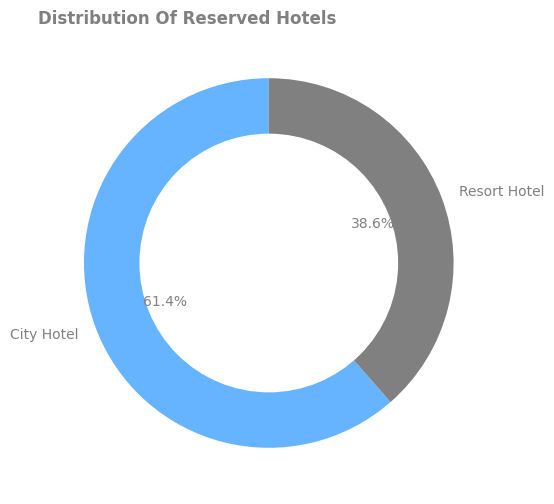

In [37]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#66b3ff','gray']
ax.pie(hotel_most_reserved["number_of_reserved"], colors=colors,
        startangle=90, labels=['City Hotel', 'Resort Hotel'], autopct='%1.1f%%',textprops=dict(color="gray"))
ax.set_title("Distribution Of Reserved Hotels", loc="left", color="gray", fontweight="bold")
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

### Q2 
What percentage of bookings were cancelled? What type of chart do you suggest to show the results?

In [75]:
hotel_df.loc[hotel_df["is_canceled"] == 0, "is_canceled"] = "not_canceled"
hotel_df.loc[hotel_df["is_canceled"] == 1, "is_canceled"] = "canceled"
hotel_booking = hotel_df[["is_canceled"]].groupby("is_canceled").agg(
    number_of_canceled_booking=("is_canceled", "count")).reset_index()
sum_of_booking = hotel_booking["number_of_canceled_booking"].sum()
hotel_booking["booking_percentage"] = np.multiply(np.divide(
    hotel_booking["number_of_canceled_booking"], sum_of_booking), 100).round(2)
hotel_booking

,is_canceled,number_of_canceled_booking,booking_percentage
0,canceled,23991,27.59
1,not_canceled,62953,72.41


#### Pie Chart Plot
Because There are two types and the difference is meaningful, pie chart is a good diagram for this analysis.

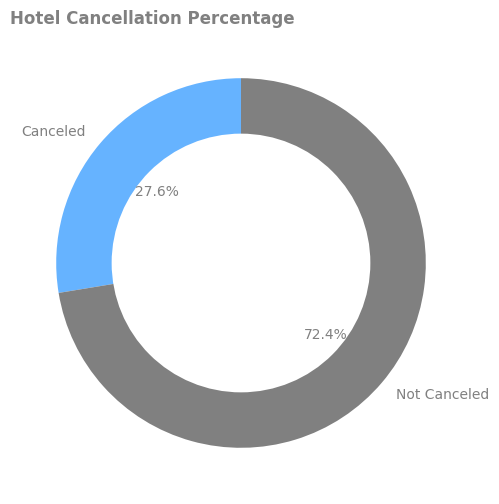

In [48]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#66b3ff','gray']
ax.pie(hotel_booking["booking_percentage"], colors=colors,
        startangle=90, labels=['Canceled', 'Not Canceled'], autopct='%1.1f%%',textprops=dict(color="gray"))
ax.set_title("Hotel Cancellation Percentage", loc="left", color="gray", fontweight="bold")
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)

### Q3
Based on different hotel types, what percentage of bookings were cancelled? What type of chart do you suggest to show the results?

In [89]:
hotel_df.loc[hotel_df["is_canceled"] == 0, "is_canceled"] = "not_canceled"
hotel_df.loc[hotel_df["is_canceled"] == 1, "is_canceled"] = "canceled"
per_hotel_booking = hotel_df[["hotel","is_canceled"]].groupby(["hotel","is_canceled"]).agg(
    number_of_canceled_booking=("is_canceled", "count")).reset_index()
per_hotel_booking
sum_of_booking_city = per_hotel_booking[per_hotel_booking["hotel"]=="City Hotel"].sum()
sum_of_booking_resort = per_hotel_booking[per_hotel_booking["hotel"]=="Resort Hotel"].sum()
# per_hotel_booking
per_hotel_booking["booking_percentage"] = 0
per_hotel_booking["booking_percentage"].loc[per_hotel_booking["hotel"] == "City Hotel"] = np.multiply(np.divide(
    per_hotel_booking["number_of_canceled_booking"], sum_of_booking_city[2]), 100).round(2)

per_hotel_booking["booking_percentage"].loc[per_hotel_booking["hotel"] == "Resort Hotel"] = np.multiply(np.divide(
    per_hotel_booking["number_of_canceled_booking"], sum_of_booking_resort[2]), 100).round(2)
per_hotel_booking

C:\Users\amine\AppData\Local\Temp\ipykernel_11992\3870615975.py:11: FutureWarning: Series.__getitem__ treating keys as positions is deprecated. In a future version, integer keys will always be treated as labels (consistent with DataFrame behavior). To access a value by position, use `ser.iloc[pos]`
  per_hotel_booking["number_of_canceled_booking"], sum_of_booking_city[2]), 100).round(2)
C:\Users\amine\AppData\Local\Temp\ipykernel_11992\3870615975.py:10: FutureWarning: ChainedAssignmentError: behaviour will change in pandas 3.0!
You are setting values through chained assignment. Currently this works in certain cases, but when using Copy-on-Write (which will become the default behaviour in pandas 3.0) this will never work to update the original DataFrame or Series, because the intermediate object on which we are setting values will behave as a copy.
A typical example is when you are setting values in a column of a DataFrame, like:

df["col"][row_indexer] = value

Use `df.loc[row_indexer,

,hotel,is_canceled,number_of_canceled_booking,booking_percentage
0,City Hotel,canceled,16045,30.03
1,City Hotel,not_canceled,37377,69.97
2,Resort Hotel,canceled,7946,23.70
3,Resort Hotel,not_canceled,25576,76.30


#### Grouped Bar Plot
As it is obvious there are groups and for that, grouped bar plot is the best choice.

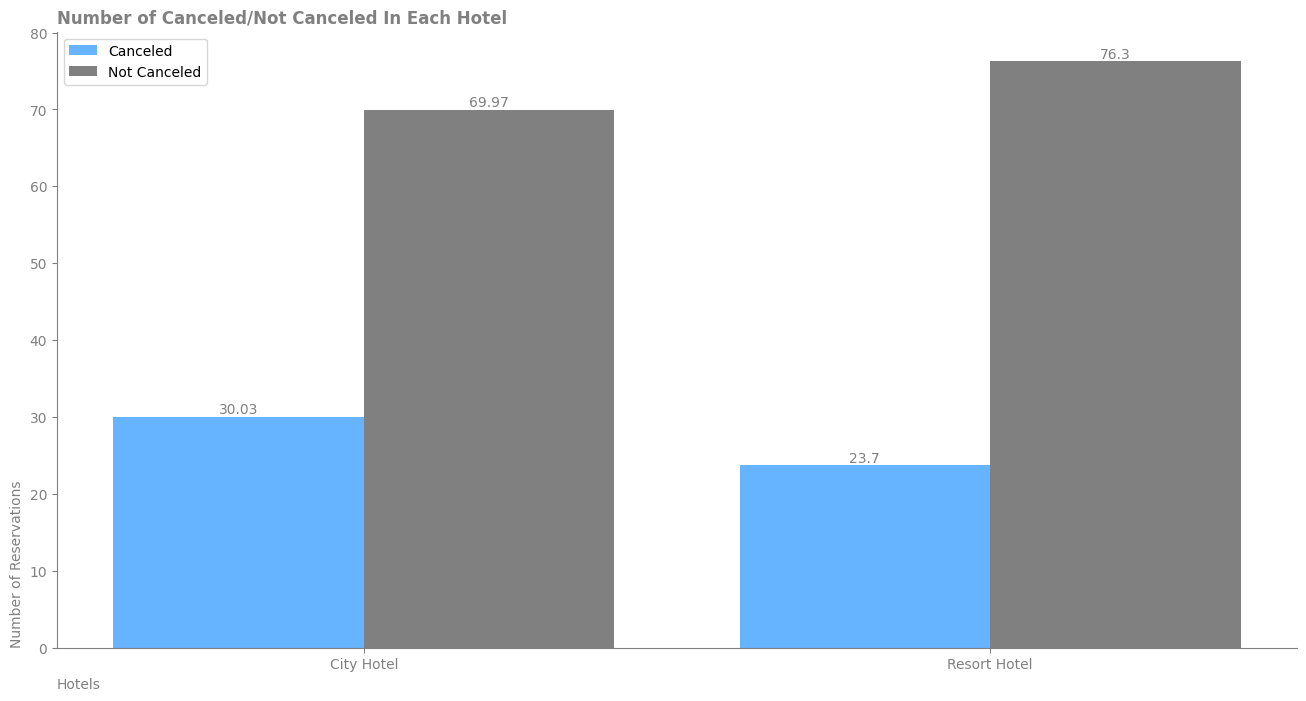

In [104]:
hotel = ["City Hotel", "Resort Hotel"]
cancel_percentage = [30.03, 23.70]
not_cancel_percentage = [69.97, 76.30]
X_axis = np.arange(len(hotel))

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(X_axis - 0.2, cancel_percentage, 0.4, label = 'Canceled', color= '#66b3ff') 
ax.bar(X_axis + 0.2, not_cancel_percentage, 0.4, label = 'Not Canceled', color='gray') 

plt.xticks(X_axis, hotel)  
ax.set_xlabel("Hotels", loc="left", color="gray")
ax.set_ylabel("Number of Reservations", loc="bottom", color="gray")
ax.set_title("Number of Canceled/Not Canceled In Each Hotel", loc="left", color="gray", fontweight="bold") 

for bars in ax.containers:
    ax.bar_label(bars, color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.legend() 
plt.show() 

### Q4 
In different years, what type of hotels were booked most and booked least? Draw a proper count plot to show the results.

In [117]:
reservation_per_year = hotel_df[["hotel","arrival_date_year"]].groupby(["arrival_date_year", "hotel"]).agg(
    number_of_reserve_each_year=("hotel","count")).reset_index()
reservation_per_year

,arrival_date_year,hotel,number_of_reserve_each_year
0,2015,City Hotel,6548
1,2015,Resort Hotel,6656
2,2016,City Hotel,26756
3,2016,Resort Hotel,15368
4,2017,City Hotel,20118
5,2017,Resort Hotel,11498


#### Grouped Bar Plot

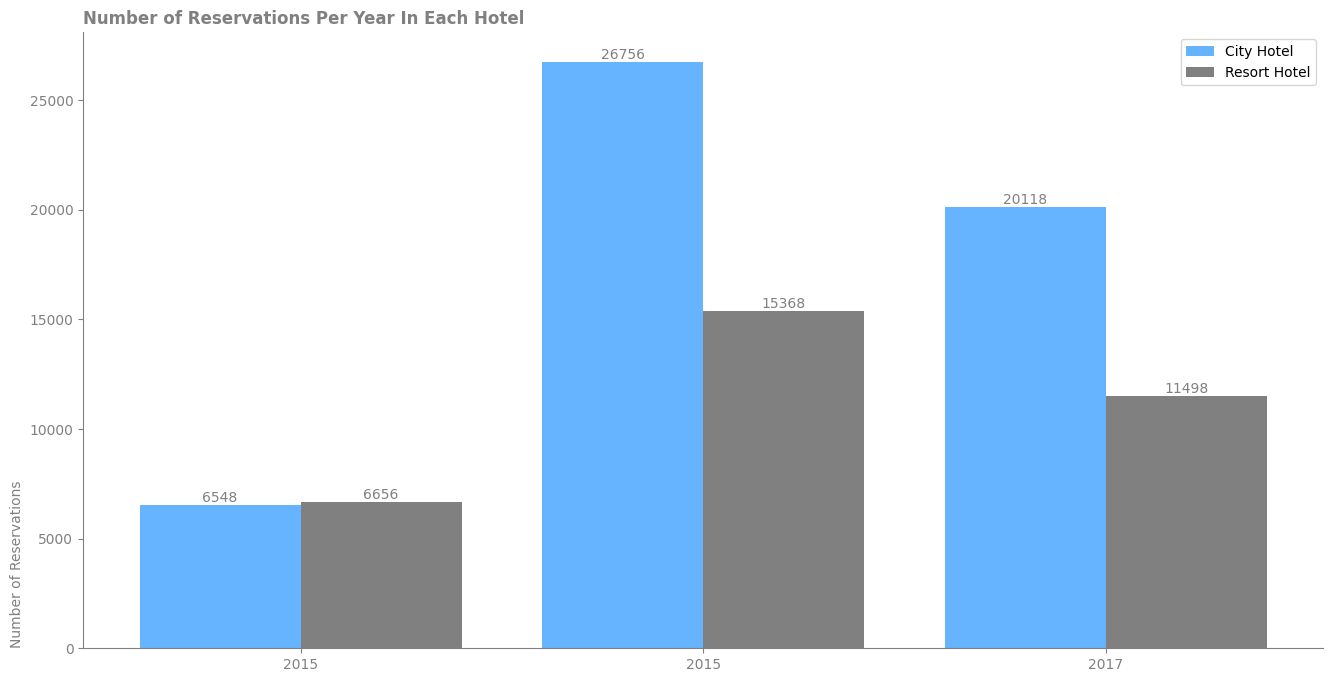

In [122]:
years = ["2015", "2015", "2017"]
city_hotel_reserve = [6548, 26756, 20118]
resort_hotel_reserve = [6656, 15368, 11498]
X_axis = np.arange(len(years))

fig, ax = plt.subplots(figsize=(16, 8))

ax.bar(X_axis - 0.2, city_hotel_reserve, 0.4, label = 'City Hotel', color= '#66b3ff') 
ax.bar(X_axis + 0.2, resort_hotel_reserve, 0.4, label = 'Resort Hotel', color='gray') 

plt.xticks(X_axis, years)  
# ax.set_xlabel("Years", loc="left", color="gray")
ax.set_ylabel("Number of Reservations", loc="bottom", color="gray")
ax.set_title("Number of Reservations Per Year In Each Hotel", loc="left", color="gray", fontweight="bold") 

for bars in ax.containers:
    ax.bar_label(bars, color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.legend() 
plt.show() 

### Q5
According to different hotel types, how ‘adr’ changes in different months?

ADR means average daily rate which is defined by the average income per occupied room your hotel makes in a set period of time.

In [81]:
hotel_df['Month_Year'] = hotel_df['reservation_status_date'].dt.to_period('M')

hotel_adr_per_month = hotel_df[["hotel", "Month_Year", "adr"]].groupby(["hotel", "Month_Year"]).agg(
    average_of_adr=("adr","mean")).reset_index().round(2)
hotel_adr_per_month

,hotel,Month_Year,average_of_adr
0,City Hotel,2014-10,62.80
1,City Hotel,2015-01,62.40
2,City Hotel,2015-02,80.75
3,City Hotel,2015-03,72.56
4,City Hotel,2015-04,77.88
...,...,...,...
63,Resort Hotel,2017-05,100.53
64,Resort Hotel,2017-06,127.38
65,Resort Hotel,2017-07,171.93
66,Resort Hotel,2017-08,206.33


#### Grouped Bar Plot

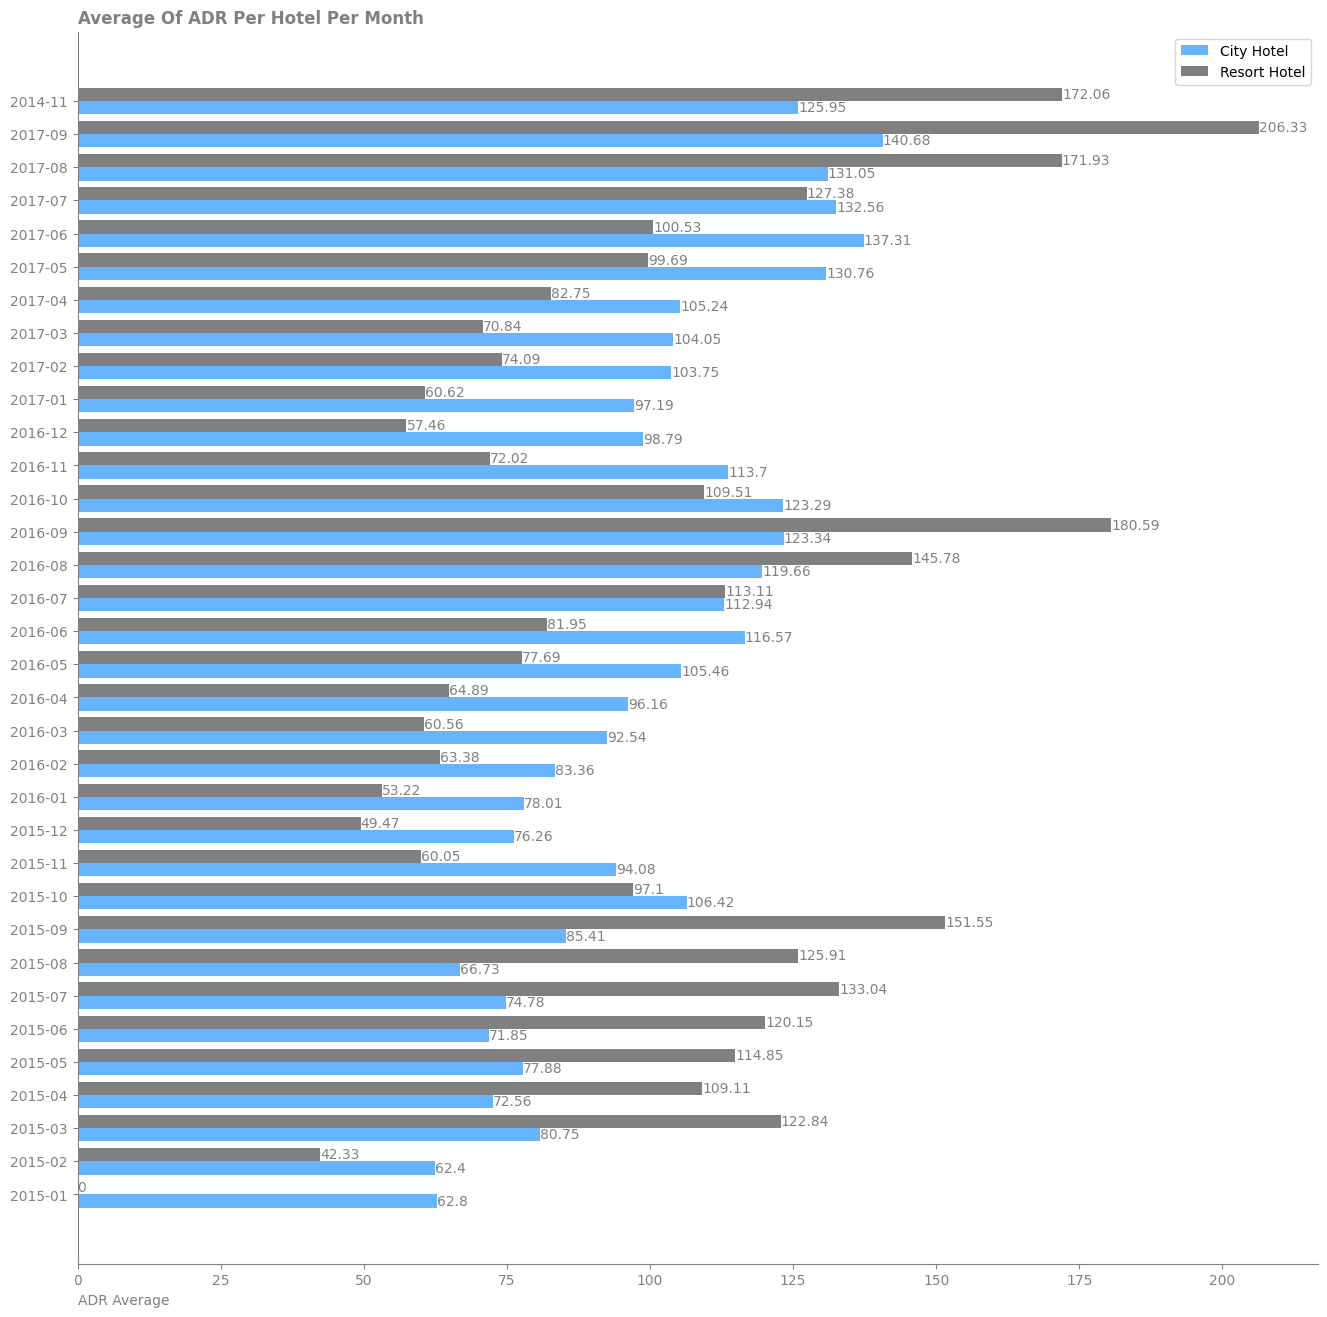

In [82]:
years_month = hotel_adr_per_month["Month_Year"].unique()[1:]
city_hotel_adr = hotel_adr_per_month.loc[hotel_adr_per_month["hotel"] == "City Hotel"]["average_of_adr"].tolist()
resort_hotel_adr = hotel_adr_per_month.loc[hotel_adr_per_month["hotel"] == "Resort Hotel"]["average_of_adr"].tolist()
X_axis = np.arange(len(years_month))

fig, ax = plt.subplots(figsize=(16, 16))

ax.barh(X_axis - 0.2, city_hotel_adr, 0.4, label = 'City Hotel', color= '#66b3ff') 
ax.barh(X_axis + 0.2, resort_hotel_adr, 0.4, label = 'Resort Hotel', color='gray') 

plt.yticks(X_axis, years_month)  
ax.set_xlabel("ADR Average", loc="left", color="gray")
# ax.set_ylabel("Number of Reservations", loc="bottom", color="gray")
ax.set_title("Average Of ADR Per Hotel Per Month", loc="left", color="gray", fontweight="bold") 

for bars in ax.containers:
    ax.bar_label(bars, color="gray")

ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')

plt.legend() 
plt.show() 

### Q6 
Check hotel wise daily rates mean, standard deviation, median, min and max.

In [149]:
hotel_reservation_per_day = hotel_df[["hotel", "reservation_status_date"]].groupby(["hotel", "reservation_status_date"]).agg(
    number_of_reservation_per_day=("reservation_status_date","count")).reset_index()

city_hotel_reservation_per_day = hotel_reservation_per_day.loc[hotel_reservation_per_day["hotel"] == "City Hotel"]
resort_hotel_reservation_per_day = hotel_reservation_per_day.loc[hotel_reservation_per_day["hotel"] == "Resort Hotel"]

city_hotel_statistic = city_hotel_reservation_per_day["number_of_reservation_per_day"].describe().round(2)
resort_hotel_statistic = resort_hotel_reservation_per_day["number_of_reservation_per_day"].describe().round(2)

print(f"The statistical information of City Hotel is:\n{city_hotel_statistic}\n\n")
print(f"The statistical information of Resort Hotel is:\n{resort_hotel_statistic}")



The statistical information of City Hotel is:
count     864.00
mean       91.82
std        79.84
min         1.00
25%        61.00
50%        86.50
75%       110.00
max      1416.00
Name: number_of_reservation_per_day, dtype: float64


The statistical information of Resort Hotel is:
count    913.00
mean      43.88
std       23.36
min        1.00
25%       31.00
50%       44.00
75%       56.00
max      147.00
Name: number_of_reservation_per_day, dtype: float64


### Q7 
Extract the number of bookings per country and investigate that most of the guests are from which countries?

In [169]:
number_of_passenger_per_country = hotel_df.groupby("country").agg(
    passenger_nationality=("country","count")).reset_index().sort_values(
        "passenger_nationality", ascending=False).head(10)
number_of_passenger_per_country

,country,passenger_nationality
135,PRT,48590
59,GBR,12129
56,FRA,10415
51,ESP,8568
43,DEU,7287
81,ITA,3766
76,IRL,3375
15,BEL,2342
25,BRA,2224
123,NLD,2104


### Horizontal Bar Plot

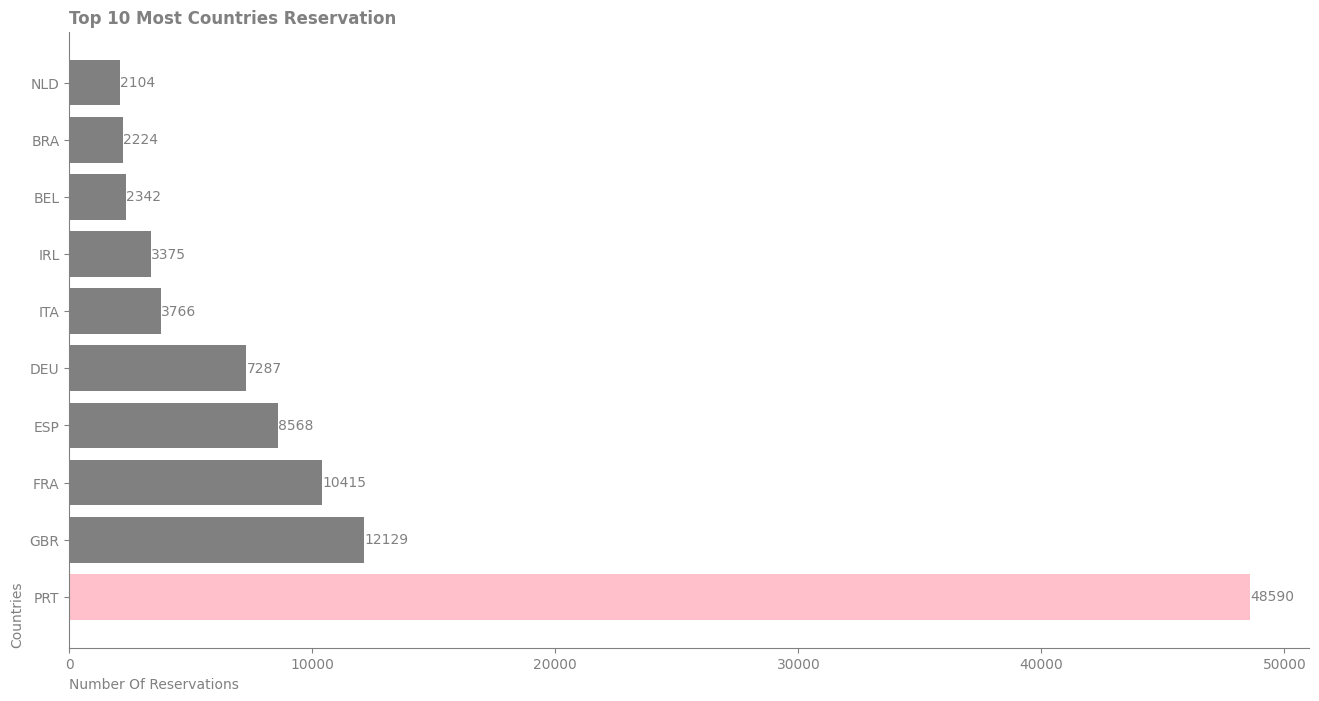

In [181]:
fig, ax = plt.subplots(figsize=(16, 8))
clrs = ["gray" if (x < max(number_of_passenger_per_country["passenger_nationality"])) else "pink"
         for x in number_of_passenger_per_country["passenger_nationality"]]

ax.barh(number_of_passenger_per_country["country"], 
        number_of_passenger_per_country["passenger_nationality"], color=clrs)

ax.set_title("Top 10 Most Countries Reservation", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Reservations", loc="left", color="gray")
ax.set_ylabel("Countries", loc="bottom", color="gray")

for bars in ax.containers:
    ax.bar_label(bars, color="gray")
    
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()

### Q8 
According to the ‘market_segment’ most of the guests book their rooms on what channels?

In [20]:
reservation_per_channel = hotel_df[["hotel", "market_segment"]].groupby("market_segment").agg(
    number_of_reservation_per_channel=("market_segment","count")).reset_index().sort_values(
        "number_of_reservation_per_channel", ascending=False)
reservation_per_channel

,market_segment,number_of_reservation_per_channel
6,Online TA,51544
5,Offline TA/TO,13857
3,Direct,11648
4,Groups,4937
2,Corporate,4031
1,Complementary,698
0,Aviation,227
7,Undefined,2


#### Horizontal Bar Plot

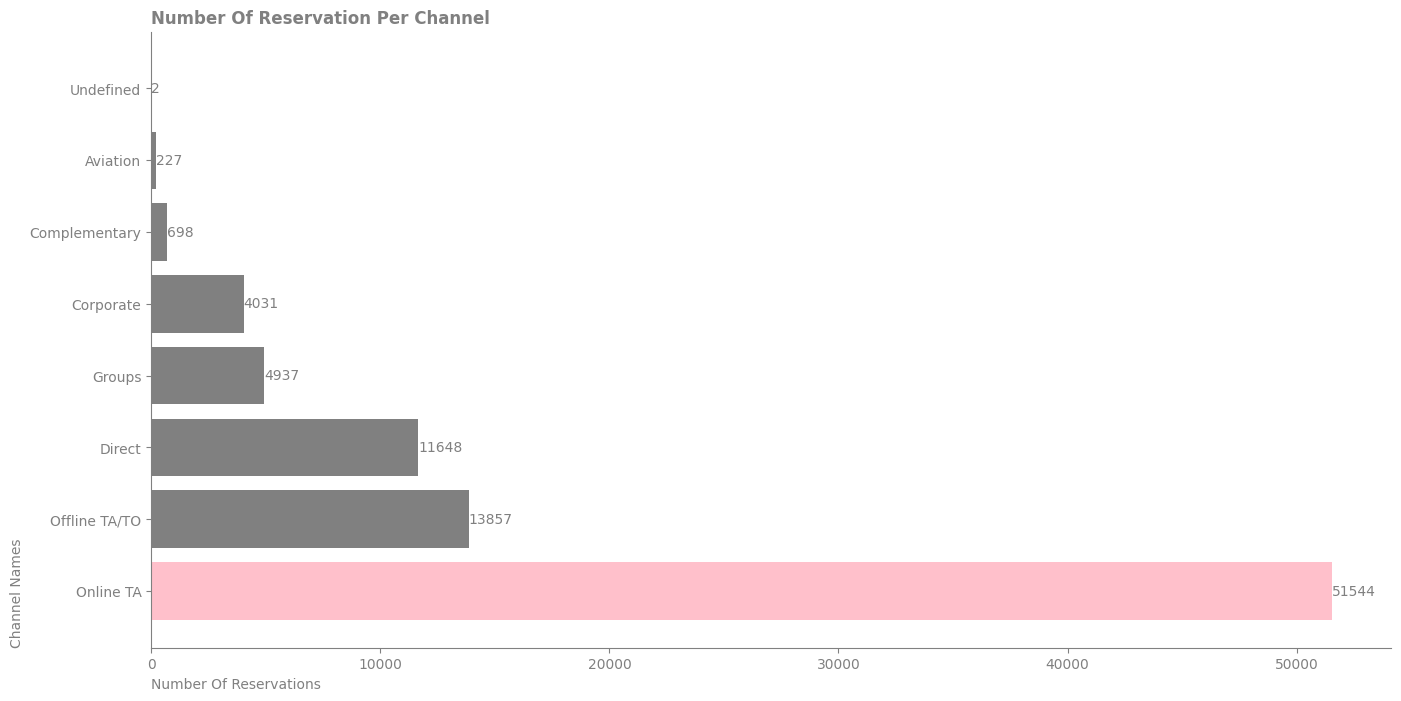

In [21]:
fig, ax = plt.subplots(figsize=(16, 8))
clrs = ["gray" if (x < max(reservation_per_channel["number_of_reservation_per_channel"])) else "pink"
         for x in reservation_per_channel["number_of_reservation_per_channel"]]

ax.barh(reservation_per_channel["market_segment"], 
        reservation_per_channel["number_of_reservation_per_channel"], color=clrs)

ax.set_title("Number Of Reservation Per Channel", loc="left", color="gray", fontweight="bold")
ax.set_xlabel("Number Of Reservations", loc="left", color="gray")
ax.set_ylabel("Channel Names", loc="bottom", color="gray")

for bars in ax.containers:
    ax.bar_label(bars, color="gray")
    
ax.spines[['right', 'top']].set_visible(False)
ax.spines[['bottom', 'left']].set_color("gray")
ax.tick_params(axis='x', colors='gray')
ax.tick_params(axis='y', colors='gray')
plt.show()

### EXTRA
Which hotel has the most cancellation?

In [96]:
hotel_number_of_canceling = hotel_df.loc[hotel_df["is_canceled"] == 1][["hotel", "is_canceled"]].groupby("hotel").agg(
    number_of_cancellation=("is_canceled","count")).reset_index()
hotel_number_of_canceling

,hotel,number_of_cancellation
0,City Hotel,16045
1,Resort Hotel,7946


#### Pie Plot

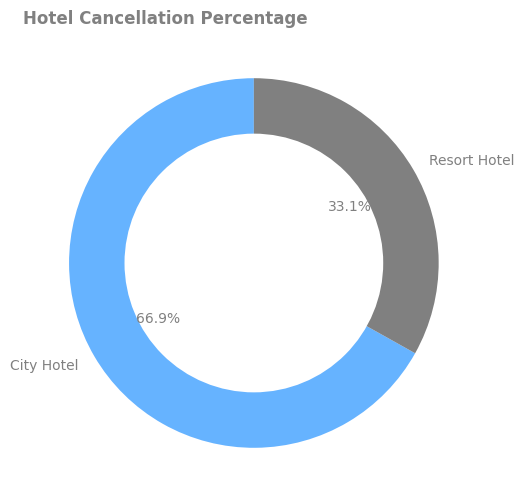

In [105]:
fig, ax = plt.subplots(figsize=(12, 6))
colors = ['#66b3ff','gray']
ax.pie(hotel_number_of_canceling["number_of_cancellation"], colors=colors,
        startangle=90, labels=['City Hotel', 'Resort Hotel'], autopct='%1.1f%%',textprops=dict(color="gray"))
ax.set_title("Hotel Cancellation Percentage", loc="left", color="gray", fontweight="bold")
centre_circle = plt.Circle((0,0),0.70,fc='white')
ax.add_artist(centre_circle)